In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense , Activation , Dropout
from tensorflow.keras.metrics import Precision , Recall , Accuracy
from keras import backend as K
from sklearn import preprocessing

In [218]:
df = pd.read_csv('data1801.csv', delimiter=',', header=None) #Чтение текстового файла
df.columns=['Time','identifier','latitude','longitude','altitude','SC','callsign','target']
df = df.drop(df.index[0])
#df = df.set_index(['identifier' , 'target']).sort_index()
#df = df.set_index('identifier')

D:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1,2,3,4,5,7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [219]:
df

,Time,identifier,latitude,longitude,altitude,SC,callsign,target
1,0:00:01,8,49.722522,40.30865,11567,1025.0,TUM9102,0
2,0:00:11,8,49.737334,40.285857,11567,1025.0,TUM9102,0
3,0:00:21,8,49.752375,40.264201,11567,1025.0,TUM9102,0
4,0:00:31,8,49.767809,40.243869,11567,1025.0,TUM9102,0
5,0:00:41,8,49.785372,40.222412,11575,1025.0,TUM9102,0
...,...,...,...,...,...,...,...,...
1184800,23:59:40,3675,61.5037,41.9406,11575,6702,NaN,1
1184801,23:59:42,3675,61.5044,41.9343,11575,6702,NaN,1
1184802,23:59:47,3675,61.5063,41.9114,11575,6702,NaN,1
1184803,23:59:53,3675,61.5025,41.8857,11575,6702,NaN,1


In [220]:
X = df.drop(['Time','identifier' , 'target','SC','callsign'] , axis = 1)
Y = df.loc[:,'target'].to_frame(name = 'target')

x_train , x_test , y_train , y_test = train_test_split(X.index , Y , test_size = 0.2 , random_state = 0)

y_train = to_categorical(y_train.astype('int32'))
y_test = to_categorical(y_test.astype('int32'))

In [221]:
def convertToArray(data):
    return np.asarray(data).astype('float64')

In [222]:
trainingX_data = preprocessing.normalize(convertToArray(X.loc[x_train]))
trainingY_label = y_train #convertToArray(Y.loc[y_train])

testX_data = preprocessing.normalize(convertToArray(X.iloc[x_test]))
testY_label = y_test #convertToArray(Y.loc[y_test])

In [226]:
optimizer = tf.keras.optimizers.Ftrl(learning_rate= 0.001)
lossFunc = tf.keras.losses.MeanSquaredError()

In [231]:
model = Sequential([
    Dense(10 , input_dim = 3 , activation = 'softplus'),
    Dropout(0.1),
    Dense(5 , activation = 'softplus'),
    Dropout(0.1),
    Dense(2 , activation = 'softplus')
])

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

model.compile(
optimizer = optimizer,
loss = lossFunc,
metrics = [f1_m]
)

history = model.fit(trainingX_data ,y_train, validation_split = 0.3 ,  epochs = 40 , batch_size = 5000 , verbose = 1)

#loss, accuracy, f1_score, precision, recall = model.evaluate(testX_data, testY_label, verbose=0)

Epoch 1/40
133/133 [==============================] - 2s 7ms/step - loss: 0.3072 - f1_m: 0.6613 - val_loss: 0.2888 - val_f1_m: 0.6667
Epoch 2/40
133/133 [==============================] - 1s 5ms/step - loss: 0.2874 - f1_m: 0.6667 - val_loss: 0.2817 - val_f1_m: 0.6667
Epoch 3/40
133/133 [==============================] - 1s 5ms/step - loss: 0.2810 - f1_m: 0.6667 - val_loss: 0.2768 - val_f1_m: 0.6667
Epoch 4/40
133/133 [==============================] - 1s 6ms/step - loss: 0.2764 - f1_m: 0.6667 - val_loss: 0.2732 - val_f1_m: 0.6667
Epoch 5/40
133/133 [==============================] - 1s 5ms/step - loss: 0.2731 - f1_m: 0.6667 - val_loss: 0.2702 - val_f1_m: 0.6667
Epoch 6/40
133/133 [==============================] - 1s 5ms/step - loss: 0.2702 - f1_m: 0.6667 - val_loss: 0.2678 - val_f1_m: 0.6667
Epoch 7/40
133/133 [==============================] - 1s 5ms/step - loss: 0.2679 - f1_m: 0.6667 - val_loss: 0.2658 - val_f1_m: 0.6667
Epoch 8/40
133/133 [==============================] - 1s 6ms/s

In [228]:
dict_class = {0:'Плохой' , 1:'Хороший'}
 
predictions = model.predict(testX_data)
predictions = np.argmax(predictions , axis = 1)[:]
label = np.argmax(testY_label , axis = 1)[:]

In [ ]:
from tkinter import Tk, RIGHT, BOTH, RAISED, LEFT, BOTTOM, Label, X, Y, TOP, filedialog, Toplevel, Text, Scrollbar, \
    Listbox, END
from tkinter.ttk import Button, Frame, Style, Entry
import tkinter.messagebox


class Application(Frame):
    def __init__(self, master=None):
        super().__init__(master)
        self.pack(fill=BOTH, expand=True,)
        self.get_some_style()
        self.create_widgets()
        self.master.title("Отслеживание полетов")
        self.master.resizable(True, True)



    def create_widgets(self):

        main_style = Style()
        main_style.configure("P.TFrame", background="navajo white")

        frame1 = Frame(self)
        frame1.pack(fill=BOTH, pady=100)

        lbl1 = Label(frame1, text="Добавьте файл с данными о трекинге", width=30)
        lbl1.pack(side=LEFT, padx=5, pady=0)

        global entry1
        entry1 = Entry(frame1)
        entry1.pack(side=LEFT, fill=X, padx=5, expand=True)

        self.btnAdd = Button(frame1, text="Добавить")
        self.btnAdd.pack(side=LEFT, fill=X, padx=5, expand=True)
        self.btnAdd.bind("<ButtonRelease>", self.open_file)

        frame2 = Frame(self)
        frame2.pack(fill=X, pady=50)

        lbl1 = Label(frame2, text="Укажите путь сохранения результата", width=30)
        lbl1.pack(side=LEFT, padx=5, pady=5)

        global entry2
        entry2 = Entry(frame2)
        entry2.pack(side=LEFT, fill=X, padx=5, expand=True)

        self.btnAdd = Button(frame2, text="Выбрать")
        self.btnAdd.pack(side=LEFT, fill=X, padx=5, expand=True)
        self.btnAdd.bind("<ButtonRelease>", self.save_file)

        self.btnExit = Button(self, text="Выход")
        self.btnExit["command"] = root.destroy
        self.btnExit.pack(side=BOTTOM,pady=10)

        self.btnHello = Button(self, text="Анализ", command=create_window)
        self.btnHello.pack(side=BOTTOM, padx=5, pady=5)


    def open_file(self, env):
        entry1.delete(0, 'end')
        env.filename = filedialog.askopenfilename(initialdir="/", title="Select file",
                                                  filetypes=(("csv files", "*.csv"), ("all files", "*")))
        entry1.insert(0, env.filename)

    def save_file(self, env):
        entry2.delete(0, 'end')
        directory = filedialog.askdirectory()
        entry2.insert(0,directory)

    def get_some_style(self):
        s = Style()
        s.configure("My.TFrame", background='white')

        frame_main = Frame(self, style="My.TFrame", height=100)
        frame_main.pack(fill=BOTH, ipady=5, ipadx=10)

        self.btnAbout = Button(frame_main, text="Помощь")
        self.btnAbout.pack(side=RIGHT, padx=10, expand=True)

        self.btnAbout = Button(frame_main, text="Авторы")
        self.btnAbout.pack(side=RIGHT, padx=10, expand=True)

        self.btnAbout = Button(frame_main, text="О программе")
        self.btnAbout.pack(side=RIGHT, padx=10, expand=True)

        self.img = tkinter.PhotoImage(file = r'C:\Users\Арсений\AVIAHAKATON\source\picture1.png') #C:\Portfolio\Hackaton\HackTask\Desktop\source\picture1.png
        self.pic = Label(frame_main, image=self.img)
        self.pic.pack(side=LEFT, expand=True)


def create_window():
    window = Toplevel(root)
    window.title("Выборка полетов")
    window.geometry("1200x900")

    frame_ch = Frame(window)
    frame_ch.pack(fill=BOTH)

    scrollbar = Scrollbar(frame_ch)
    scrollbar.pack(side=RIGHT, fill=Y)

    text = open(str(entry1.get()), encoding='utf-8').readlines()
    text = ''.join(text)
    textline = Text(frame_ch, yscrollcommand=scrollbar.set, height=50)
    textline.insert(1.0, text)
    textline.pack(side=RIGHT, fill=Y, expand=True)
    scrollbar.config(command=textline.yview)

    save = open(str(entry2.get())+"\\result.txt", 'w')
    #save.write("Идентификатор: {0} - Прогноз: {1}".format(,))
    save.close()


if __name__ == '__main__':
    root = Tk()
    root.geometry("1200x700")
    app = Application(master=root)
    root.mainloop()

dict_keys(['loss', 'accuracy'])


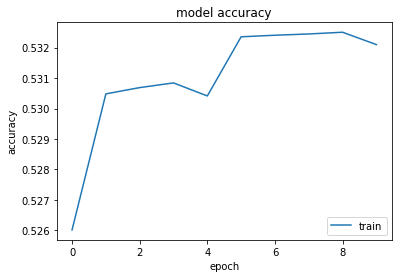